In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/heart_disease1.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


In [3]:
X = df.drop(columns=['num'])
y = df['num']

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)
print(rf.feature_importances_)

[0.09790674 0.03437501 0.13988907 0.07442586 0.07860549 0.00898613
 0.01987281 0.12397076 0.03455159 0.10167857 0.04749232 0.11313867
 0.125107  ]


In [5]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf,n_features_to_select=5, step=1)
rfe = rfe.fit(X, y)

print(rfe.support_)

[ True False  True False False False False  True False  True False False
  True]


In [6]:
temp = 0
X_rfe = pd.DataFrame(X)
for i in range(0, rfe.support_.size):
    j = i - temp
    if not rfe.support_[i] :
        X_rfe.drop(X_rfe.columns[[j]], axis=1, inplace=True)
        temp = temp + 1

X_rfe

,age,cp,thalach,oldpeak,thal
0,0.708333,0.000000,0.603053,0.370968,0.75
1,0.791667,1.000000,0.282443,0.241935,0.00
2,0.791667,1.000000,0.442748,0.419355,1.00
3,0.166667,0.666667,0.885496,0.564516,0.00
4,0.250000,0.333333,0.770992,0.225806,0.00
...,...,...,...,...,...
292,0.583333,1.000000,0.396947,0.032258,1.00
293,0.333333,0.000000,0.465649,0.193548,1.00
294,0.812500,1.000000,0.534351,0.548387,1.00
295,0.583333,1.000000,0.335878,0.193548,1.00


In [7]:
from sklearn.feature_selection import chi2, SelectKBest

selector = SelectKBest(score_func=chi2, k=5)
selector.fit_transform(X, y)

selector.get_support()

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True])

In [8]:
temp = 0
X_chi2 = pd.DataFrame(X)
for i in range(0, selector.get_support().size):
    j = i - temp
    if not selector.get_support()[i] :
        X_chi2.drop(X_chi2.columns[[j]], axis=1, inplace=True)
        temp = temp + 1

X_chi2

,exang,oldpeak,slope,ca,thal
0,0.0,0.370968,1.0,0.000000,0.75
1,1.0,0.241935,0.5,1.000000,0.00
2,1.0,0.419355,0.5,0.666667,1.00
3,0.0,0.564516,1.0,0.000000,0.00
4,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...
292,1.0,0.032258,0.5,0.000000,1.00
293,0.0,0.193548,0.5,0.000000,1.00
294,0.0,0.548387,0.5,0.666667,1.00
295,1.0,0.193548,0.5,0.333333,1.00


In [9]:
X_final = X[['ca', 'thal', 'cp', 'thalach', 'oldpeak']]
df = pd.concat([X_final, y], axis=1)
df

,ca,thal,cp,thalach,oldpeak,num
0,0.000000,0.75,0.000000,0.603053,0.370968,0.0
1,1.000000,0.00,1.000000,0.282443,0.241935,1.0
2,0.666667,1.00,1.000000,0.442748,0.419355,1.0
3,0.000000,0.00,0.666667,0.885496,0.564516,0.0
4,0.000000,0.00,0.333333,0.770992,0.225806,0.0
...,...,...,...,...,...,...
292,0.000000,1.00,1.000000,0.396947,0.032258,1.0
293,0.000000,1.00,0.000000,0.465649,0.193548,1.0
294,0.666667,1.00,1.000000,0.534351,0.548387,1.0
295,0.333333,1.00,1.000000,0.335878,0.193548,1.0


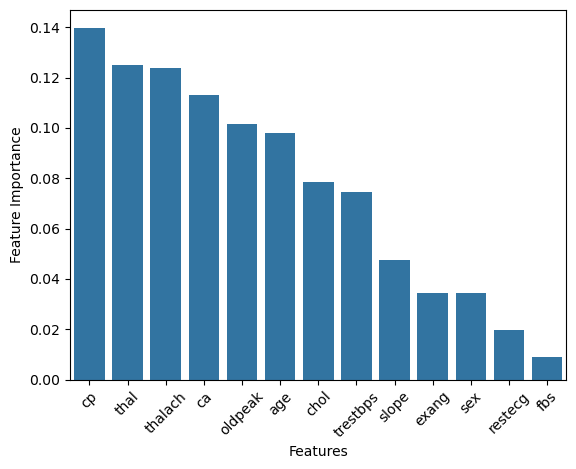

In [10]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = X.columns[indices]
sorted_importances = importances[indices]

sns.barplot(x=sorted_features, y=sorted_importances)
plt.xticks(rotation=45)
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

In [11]:
df.to_csv('../data/heart_disease3.csv')